In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
rydde_data = pd.read_excel("2-Rydde - Aksjoner med funn _Ny protokoll_.xlsx")

In [4]:
rydde_data.columns.values

array(['id', 'name', 'organisation', 'startdate', 'enddate', 'startyear',
       'endyear', 'start_hour', 'end_hour', 'description', 'cleaningteam',
       'cleaningteam_type', 'operation_type', 'operationmeetingplace',
       'published', 'number_of_participants', 'number_of_waste_bags',
       'kg_of_collected_waste', 'handout_gloves', 'handout_wastebags',
       'municipality', 'county', 'join_code', 'cleaning_code',
       'municipality_name', 'county_name', 'registration_completed',
       'meters_cleaned_beach', 'adopted', 'engangsdekketoy', 'ballonger',
       'glassflasker', 'klaer_tekstiler', 'lightere', 'matemballasje',
       'sigarettsneiper', 'engangsgriller', 'leker_smokker',
       'lokk_korker', 'sko', 'sugeroer', 'agnemballasje',
       'boeyer_flottoerer', 'fiskegarn', 'fiskekasser', 'fiskekroker',
       'fiskesnoere', 'olje_bensinkanner', 'tau_over_50cm',
       'tau_under_50cm', 'teiner', 'armeringsfiber',
       'isolasjonsmateriale', 'plastpellets', 'sprengkabler

In [5]:
# check that all column have at least one data point
rydde_data.isnull().values.all(axis=0)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [17]:
rydde_data['county_name'].unique()


array(['Vestland', 'Troms og Finnmark', 'Nordland', 'Rogaland', 'Oslo',
       'Møre og Romsdal', 'Trøndelag', 'Innlandet', 'Viken',
       'Vestfold og Telemark', 'Agder', 'Utlandet', 'Til sjøs'],
      dtype=object)

In [7]:
rydde_data['cleaning_code']


0       79c4
1       c3f4
2       43a2
3       f64e
4       18ba
        ... 
1158    78a0
1159    f620
1160    0c2d
1161    d090
1162    eac4
Name: cleaning_code, Length: 1163, dtype: object

In [8]:
# not sure what this means exactly

rydde_data['adopted'].dropna()

192                          Miljøagentene Andøy
193                          Miljøagentene Andøy
245                             Spireviken lille
251                             Ryvingens venner
252                             Ryvingens venner
369                                     Ren Kyst
373     Fannys Adopsjonsgruppe (Pindslefamilien)
397           Brukerutvalget på Langøytangen fyr
414                                     Ren Kyst
468                          Miljøagentene Andøy
527                                     Skjåvika
770                                 Sotra Rotary
803          NordPolen - polsk forening i Tromsø
1029                                        448C
Name: adopted, dtype: object

In [9]:
rydde_data['kommentar'].dropna()


6                                Er et stort kjøpesenter
7                    innerst i oljebasehavna på Tananger
59     Kråkene tar med seg gravlyktene fra kirkegårde...
61     Øya ligger i mundingen til Ørstafjorden,  slik...
106    Vi greier ikke å registrere alt vi finner, det...
109    Egentlig umulig å velge antall for vi bare fyl...
118                Se bilde tre, vet ikke hva dette er. 
120    1 engangsfortøyning, mest sanns fra oppdrettsa...
138    Merk at andre hadde allerede ryddet mye av de ...
154    Det var ennå så mye snø og dårlige leteforhold...
171    Merk at Fetsund Lenser selv hadde en stor rydd...
219       Båtplass i fjæra hvor gammelt linebruk brennes
237    Søppelbøtten var ikke fulle nå, men kan nok væ...
261    Søppelbøttene var ikke fulle nå, men kan nok v...
280    Uendelig med tau. Både svære noter/garn og små...
324    •\tDer ligger et not-bøteri i det området jeg ...
325    På hele strekningen ligger det mengder plastav...
348                            

In [10]:
rydde_data['media_files'].dropna()

0       1
1       2
2       1
3       0
4       0
       ..
1158    0
1159    0
1160    0
1161    0
1162    0
Name: media_files, Length: 1163, dtype: int64

In [11]:
# geo data in the well known text format
rydde_data['geom_wkt'].dropna()

0       POINT(-47960.9126950905 6840481.35946629)
1       POINT(-48179.9497953083 6838246.06303606)
2        POINT(16680.7753146004 6892865.60844617)
3         POINT(998267.038825701 7910113.5572842)
4       POINT(-33686.6911567467 6739252.04791553)
                          ...                    
1158     POINT(1073547.98985249 6911381.33743086)
1159      POINT(402460.156857298 7320250.5465465)
1160      POINT(262146.98405294 6646547.74358151)
1161     POINT(137408.976891428 6497110.10170079)
1162      POINT(95911.0807373016 6459854.9819133)
Name: geom_wkt, Length: 1163, dtype: object

In [12]:
rydde_data['serveringssteder'].dropna()

# meaning = catering establishments (?)

59       True
109     False
138      True
325      True
334      True
749      True
848     False
945      True
992      True
1030     True
1125    False
1128    False
1150    False
Name: serveringssteder, dtype: object

In [13]:
numerical_cols = rydde_data.select_dtypes(include=["float", 'int'])
sort_ncol = numerical_cols.drop(columns = ['id', 'start_hour', 'end_hour','media_files','municipality', 'county' ])
len(sort_ncol.columns)

87

array([[<AxesSubplot:title={'center':'startyear'}>,
        <AxesSubplot:title={'center':'endyear'}>,
        <AxesSubplot:title={'center':'number_of_participants'}>,
        <AxesSubplot:title={'center':'number_of_waste_bags'}>,
        <AxesSubplot:title={'center':'kg_of_collected_waste'}>,
        <AxesSubplot:title={'center':'meters_cleaned_beach'}>,
        <AxesSubplot:title={'center':'engangsdekketoy'}>,
        <AxesSubplot:title={'center':'ballonger'}>,
        <AxesSubplot:title={'center':'glassflasker'}>],
       [<AxesSubplot:title={'center':'klaer_tekstiler'}>,
        <AxesSubplot:title={'center':'lightere'}>,
        <AxesSubplot:title={'center':'matemballasje'}>,
        <AxesSubplot:title={'center':'sigarettsneiper'}>,
        <AxesSubplot:title={'center':'engangsgriller'}>,
        <AxesSubplot:title={'center':'leker_smokker'}>,
        <AxesSubplot:title={'center':'lokk_korker'}>,
        <AxesSubplot:title={'center':'sko'}>,
        <AxesSubplot:title={'center':'sug

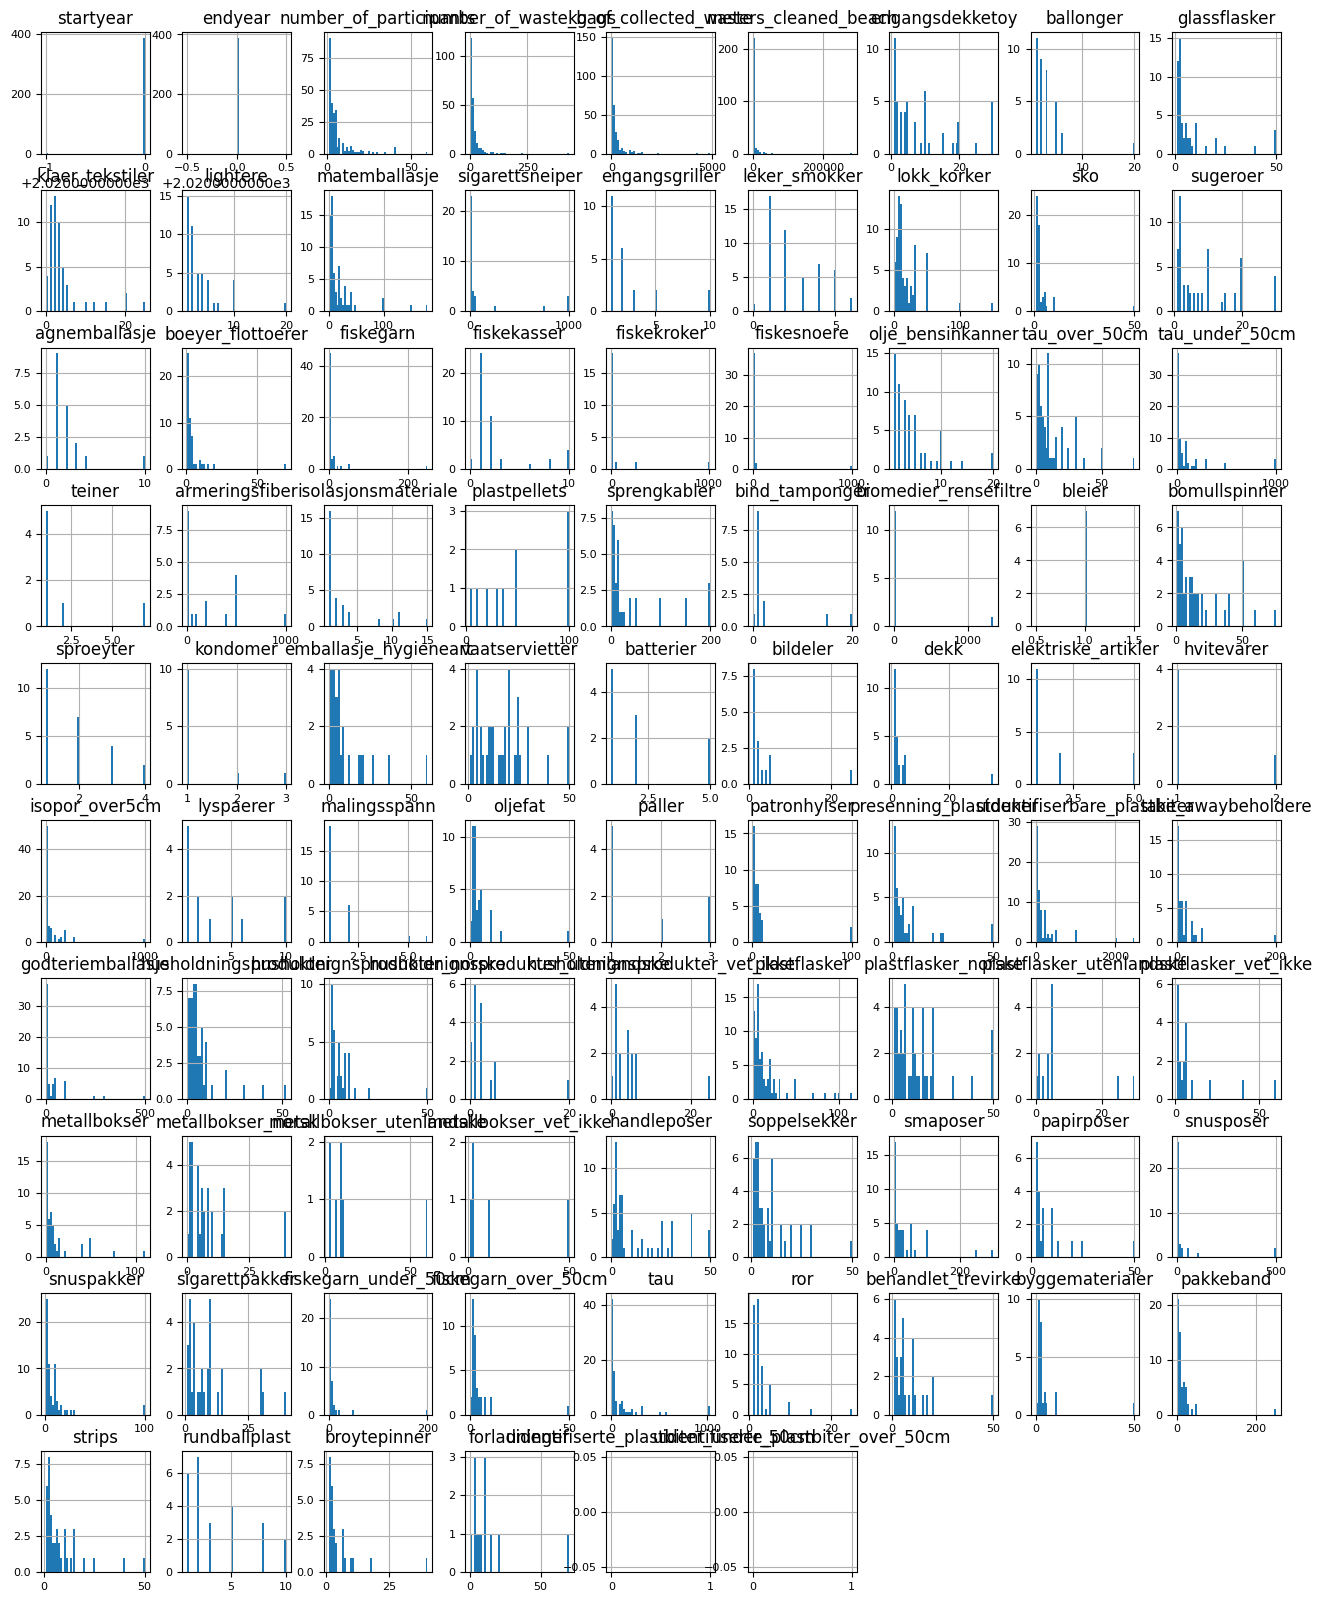

In [14]:
import numpy as np
df_split = np.array_split(sort_ncol, 3)

df_split[0].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [15]:
sort_ncol['uidentifiserte_plastbiter_over_50cm'].dropna()

848     0.0
1125    0.0
1128    0.0
1150    8.0
Name: uidentifiserte_plastbiter_over_50cm, dtype: float64

count      876.000000
mean       291.134703
std       1133.416061
min          0.000000
25%         30.000000
50%        100.000000
75%        250.000000
max      30500.000000
Name: kg_of_collected_waste, dtype: float64


C:\Users\jlari\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


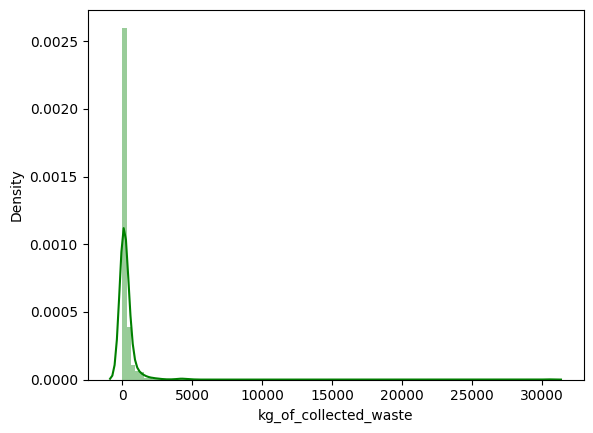

In [16]:
print(rydde_data['kg_of_collected_waste'].describe())
import seaborn as sns
sns.distplot(rydde_data['kg_of_collected_waste'], color='g', bins=100, hist_kws={'alpha': 0.4});